In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv('books.csv', on_bad_lines='skip')

In [5]:
df["language_code"].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [7]:
df_cleaned = df.dropna()

In [9]:
df_cleaned['language_code'].value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [11]:
podzielone_jezyki = df_cleaned.groupby(by="language_code")

In [13]:
podzielone_jezyki.describe()

bookID                                                          \
                count          mean           std      min       25%      50%   
language_code                                                                   
ale               1.0  44012.000000           NaN  44012.0  44012.00  44012.0   
ara               1.0   4315.000000           NaN   4315.0   4315.00   4315.0   
en-CA             7.0  16843.857143  14697.876359   2819.0   4889.00  18182.0   
en-GB           214.0  22843.448598  13782.693948    537.0  11325.25  22956.5   
en-US          1408.0  22448.262784  13320.303266      9.0  11191.50  22494.0   
eng            8908.0  21091.059722  13018.487243      1.0  10033.75  19791.0   
enm               3.0  12742.666667  17384.017324   2701.0   2706.00   2711.0   
fre             144.0  20325.159722  11553.433961     80.0  11975.75  18074.0   
ger              99.0  22622.858586  12560.436609   2875.0  11450.00  20394.0   
gla               1.0  43504.000000           NaN  43504.0  43504.00  43504.0   
glg               1.0  23114.000000           NaN  23114.0  23114.00  23114.0   
grc              11.0  10642.272727  13258.401812   1475.0   1575.50   2452.0   
ita               5.0  27878.000000  11712.477599  13916.0  19164.00  30143.0   
jpn              46.0  19922.521739   9648.042196   2885.0  13594.25  22785.0   
lat               3.0  13186.000000   4667.877034   7796.0  11838.00  15880.0   
msa               1.0  22277.000000           NaN  22277.0  22277.00  22277.0   
mul              19.0  10415.631579  10457.292194    576.0   1482.50   9442.0   
nl                1.0   5230.000000           NaN   5230.0   5230.00   5230.0   
nor               1.0  32592.000000           NaN  32592.0  32592.00  32592.0   
por              10.0  33024.200000  16755.987393   7838.0  16541.75  45615.5   
rus               2.0  18470.500000    895.904292  17837.0  18153.75  18470.5   
spa             218.0  22521.518349  14658.277932    201.0  10652.75  22270.0   
srp               1.0  10200.000000           NaN  10200.0  10200.00  10200.0   
swe               2.0  35291.500000   6371.739205  30786.0  33038.75  35291.5   
tur               1.0  41909.000000           NaN  41909.0  41909.00  41909.0   
wel               1.0  25426.000000           NaN  25426.0  25426.00  25426.0   
zho              14.0  23774.785714  10436.084700   5991.0  15300.00  31992.5   

                                 average_rating            ... ratings_count  \
                    75%      max          count      mean  ...           75%   
language_code                                              ...                 
ale            44012.00  44012.0            1.0  4.360000  ...        102.00   
ara             4315.00   4315.0            1.0  3.550000  ...        122.00   
en-CA          21250.00  44628.0            7.0  4.025714  ...       5171.00   
en-GB          34313.75  45570.0          214.0  3.923411  ...        971.00   
en-US          33161.25  45630.0         1408.0  3.914659  ...       2207.00   
eng            31962.00  45639.0         8908.0  3.934062  ...       6575.75   
enm            17763.50  32816.0            3.0  3.873333  ...       4454.50   
fre            27771.50  45531.0          144.0  3.971528  ...        195.50   
ger            33232.00  45449.0           99.0  3.950101  ...         45.00   
gla            43504.00  43504.0            1.0  4.470000  ...         11.00   
glg            23114.00  23114.0            1.0  3.360000  ...         36.00   
grc            19352.00  37043.0           11.0  3.707273  ...         63.50   
ita            32408.00  43759.0            5.0  4.078000  ...        333.00   
jpn            22819.25  38376.0           46.0  4.268696  ...         36.25   
lat            15881.00  15882.0            3.0  4.353333  ...        140.50   
msa            22277.00  22277.0            1.0  4.110000  ...         28.00   
mul            14495.50  31582.0           19.0  4.126316  ...  

Które książki cieszą się większą popularnością: azjatyckie (chińskie, japońskie, malajskie, arabskie); romańskie (francuskie, hiszpańskie, portugalskie, włoskie) czy germańskie (niemieckie, niderlandzkie)?

In [77]:
df['language_category'] = df['language_code'].replace({
    'zho': 'Asian', 'jpn': 'Asian', 'msa': 'Asian', 'ara': 'Asian',
    'fre': 'Romance', 'spa': 'Romance', 'por': 'Romance', 'ita': 'Romance',
    'ger': 'Germanic', 'nl': 'Germanic'})

In [79]:
print(df['language_category'].unique())

['eng' 'en-US' 'Romance' 'en-GB' 'mul' 'grc' 'enm' 'en-CA' 'Germanic'
 'Asian' 'lat' 'srp' 'rus' 'glg' 'wel' 'swe' 'nor' 'tur' 'gla' 'ale']


In [81]:
azjatyckie_df = df[df['language_category'] == 'Asian']

In [83]:
shapiro_test_azjatyckie = stats.shapiro(azjatyckie_df['ratings_count'])

In [85]:
shapiro_test_azjatyckie

ShapiroResult(statistic=0.5498965959384989, pvalue=1.6829004248446287e-12)

In [87]:
germanskie_df = df[df['language_category'] == 'Germanic']

In [89]:
shapiro_test_germanskie = stats.shapiro(germanskie_df['ratings_count'])

In [91]:
shapiro_test_germanskie

ShapiroResult(statistic=0.19921630833195314, pvalue=7.14831663717589e-21)

In [93]:
romanskie_df = df[df['language_category'] == 'Romance']

In [95]:
shapiro_test_romanskie = stats.shapiro(romanskie_df['ratings_count'])

In [97]:
shapiro_test_romanskie

ShapiroResult(statistic=0.11672532066001096, pvalue=1.9654898145075812e-38)

In [99]:
stats.kruskal(df[df["language_category"] == 'Asian']['ratings_count'], 
              df[df["language_category"] == 'Germanic']['ratings_count'], 
              df[df["language_category"] == 'Romance']['ratings_count'])

KruskalResult(statistic=37.923906667810165, pvalue=5.820071244790323e-09)

In [101]:
df[df["language_category"] == 'Romance']['ratings_count']

50        698
109         6
146        63
150      4136
201        21
         ... 
11113     207
11114     396
11115     161
11116     215
11122     113
Name: ratings_count, Length: 377, dtype: int64

In [103]:
na_wykres = df[df["language_category"].isin(['Asian', 'Germanic', 'Romance'])]

In [105]:
na_wykres

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,language_category
50,80,La Place de la Concorde Suisse,John McPhee,3.92,0374519323,9780374519322,fre,160,698,52,4/1/1994,Farrar Straus and Giroux,Romance
109,201,Una arruga en el tiempo – A Wrinkle in Time,Madeleine L'Engle,4.00,0606105263,9780606105262,spa,205,6,1,6/1/1984,Turtleback Books,Romance
146,324,Cien años de soledad,Gabriel García Márquez,4.07,0785950109,9780785950103,spa,448,63,7,1/1/1990,French & European,Romance
150,337,El perfume: Historia de un asesino,Patrick Süskind,4.02,8432216062,9788432216060,spa,239,4136,255,6/1/2002,Booket,Romance
201,466,Timbuktu / Leviathan / Moon Palace,Paul Auster,4.38,2742741461,9782742741465,fre,1075,21,1,11/7/2002,Actes Sud,Romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,45617,O Cavalo e o Seu Rapaz (As Crónicas de Nárnia ...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.92,9722330551,9789722330558,por,160,207,16,8/15/2003,Editorial Presença,Romance
11114,45623,O Sobrinho do Mágico (As Crónicas de Nárnia #1),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.04,9722329987,9789722329989,por,147,396,37,4/8/2003,Editorial Presença,Romance
11115,45625,A Viagem do Caminheiro da Alvorada (As Crónica...,C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,4.09,9722331329,9789722331326,por,176,161,14,9/1/2004,Editorial Presença,Romance
11116,45626,O Príncipe Caspian (As Crónicas de Nárnia #4),C.S. Lewis/Pauline Baynes/Ana Falcão Bastos,3.97,9722330977,9789722330978,por,160,215,11,10/11/2003,Editorial Presença,Romance


Text(0, 0.5, 'Ilość ocen')

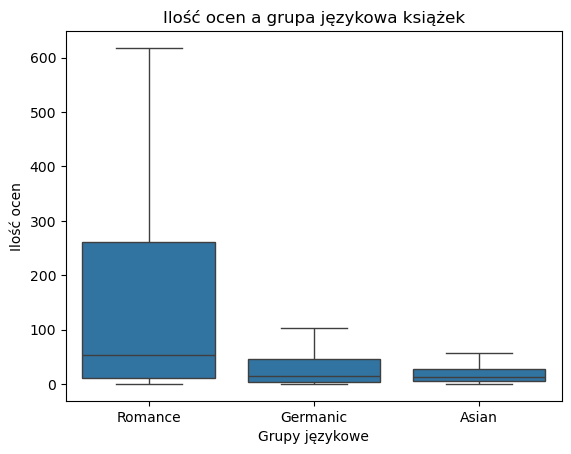

In [107]:
sns.boxplot(na_wykres, x= "language_category", y="ratings_count",showfliers=False)
plt.title("Ilość ocen a grupa językowa książek")
plt.xlabel("Grupy językowe")
plt.ylabel("Ilość ocen")

Czy wraz z ilością stron, oceny się pogarszają?

In [113]:
data_strony = df['  num_pages']

In [115]:
data_1 = stats.kstest(data_strony, 'norm', args=(data_strony.mean(), data_strony.std()))

In [117]:
data_1

KstestResult(statistic=0.12602043893900683, pvalue=1.9432346124210725e-154, statistic_location=400, statistic_sign=1)

In [119]:
data_srednia_ocen = df['average_rating']

In [121]:
data_2 = stats.kstest(data_srednia_ocen, 'norm', args=(data_strony.mean(), data_strony.std()))

In [123]:
data_2

KstestResult(statistic=0.9153189617497455, pvalue=0.0, statistic_location=5.0, statistic_sign=1)

In [125]:
stats.spearmanr(df['  num_pages'], df['average_rating'], nan_policy='omit')

SignificanceResult(statistic=0.10990097061937461, pvalue=3.086791254876889e-31)

Text(0, 0.5, 'Średnia ocen')

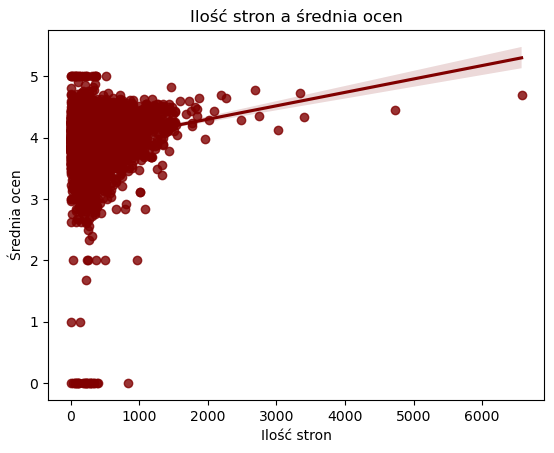

In [141]:
sns.regplot(data=df, x='  num_pages', y='average_rating', color='maroon')
plt.title("Ilość stron a średnia ocen")
plt.xlabel("Ilość stron")
plt.ylabel("Średnia ocen")

In [133]:
oczyszczony_wykres = df[df['  num_pages'] <= 2000]

<Axes: xlabel='  num_pages', ylabel='average_rating'>

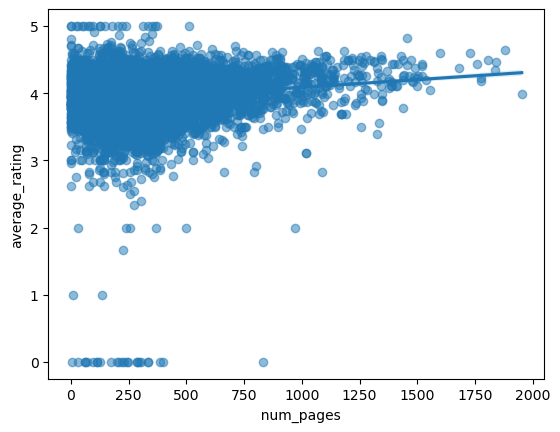

In [139]:
sns.regplot(data=oczyszczony_wykres, x='  num_pages', y='average_rating', scatter_kws={'alpha': 0.5})

Czy książki romańskie otrzymują więcej recenzji pisemnych od germańskich?

In [159]:
shapiro_test_romanskie_recenzje = stats.shapiro(romanskie_df['text_reviews_count'])

In [161]:
shapiro_test_romanskie_recenzje

ShapiroResult(statistic=0.23242471492262384, pvalue=1.4078870148778258e-36)

In [163]:
shapiro_test_germanskie_recenzje = stats.shapiro(germanskie_df['text_reviews_count'])

In [165]:
shapiro_test_germanskie_recenzje

ShapiroResult(statistic=0.20863896800127812, pvalue=9.14719383379802e-21)

In [167]:
stats.mannwhitneyu(df[(df["language_category"] == 'Romance')]['text_reviews_count'],
                   df[(df["language_category"] == 'Germanic')]['text_reviews_count'], 
                   nan_policy='omit')

MannwhitneyuResult(statistic=25734.0, pvalue=1.4686995251395871e-08)

In [169]:
na_wykres_3 = df[df["language_category"].isin(['Germanic', 'Romance'])]

Text(0, 0.5, 'Ilość rencezji pisemnych')

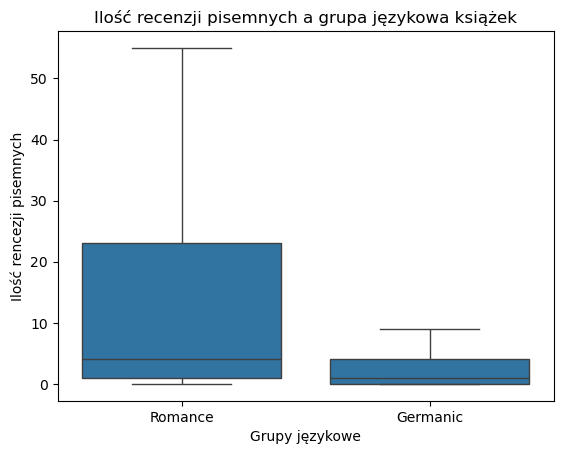

In [179]:
ax =sns.boxplot(data=na_wykres_3, x="language_category", y='text_reviews_count', showfliers=False)
plt.title("Ilość recenzji pisemnych a grupa językowa książek")
plt.xlabel("Grupy językowe")
plt.ylabel("Ilość rencezji pisemnych")

Czy książki wykorzystujące inny alfabet niż łaciński są dłuższe?

In [15]:
df['language_category_2'] = df['language_code'].replace({'zho': 'non_Latin', 'jpn': 'non_Latin', 'msa': 'non_Latin', 'ara': 'non_Latin',
    'fre': 'Latin', 'spa': 'Latin', 'por': 'Latin', 'ita': 'Latin',
    'ger': 'Latin', 'nl': 'Latin', 'rus': 'Latin', 'swe': 'Latin', 'nor': 'Latin'})

In [17]:
lacinskie_df = df[df['language_category_2'] == 'Latin']

In [214]:
shapiro_test_lacinskie = stats.shapiro(lacinskie_df['  num_pages'])

In [216]:
shapiro_test_lacinskie

ShapiroResult(statistic=0.939454253039358, pvalue=4.220926278755993e-13)

In [218]:
nie_lacinskie_df = df[df['language_category_2'] == 'non_Latin']

In [220]:
shapiro_test_nie_lacinskie = stats.shapiro(nie_lacinskie_df['  num_pages'])

In [222]:
shapiro_test_nie_lacinskie

ShapiroResult(statistic=0.4544968470761954, pvalue=8.114856179518402e-14)

In [224]:
stats.mannwhitneyu(df[df["language_category_2"] == 'Latin']['  num_pages'], 
              df[df["language_category_2"] == 'non_Latin']['  num_pages'])

MannwhitneyuResult(statistic=21359.5, pvalue=3.6196531935047726e-08)

In [226]:
na_wykres_2 = df[df["language_category_2"].isin(['Latin', 'non_Latin'])]

Text(0, 0.5, 'Ilość stron')

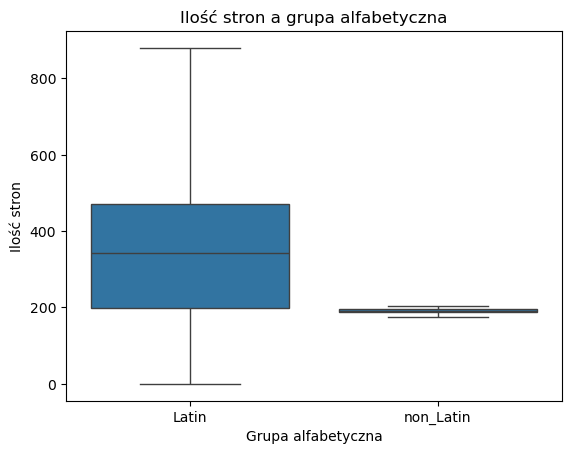

In [230]:
sns.boxplot(na_wykres_2, x= "language_category_2", y="  num_pages", showfliers=False)
plt.title("Ilość stron a grupa alfabetyczna")
plt.xlabel("Grupa alfabetyczna")
plt.ylabel("Ilość stron")

Czy książki z wymarłymi językami/dialektami są dobrze (3<) czy źle oceniane (>3)?

In [29]:
df['ocena'] = df['average_rating'].apply(lambda x: 'gorsze' if x < 4 else 'lepsze')

In [31]:
df['language_category_3'] = df['language_code'].replace({'grc': 'dead', 'enm': 'dead', 'lat': 'dead', 'glg': 'dead',
                                                        'wel': 'dead', 'gla': 'dead', 'ale': 'dead', 'tur': 'alive', 'nor': 'alive',
                                                        'nl': 'alive', 'rus': 'alive', 'ita':'alive', 'lat':'alive'})

In [33]:
wymarle_df = df[df['language_category_3'] == 'dead']

In [35]:
zywe_df = df[df['language_category_3'] == 'alive']

In [37]:
podliczone_wymarle = wymarle_df['ocena'].value_counts()

In [39]:
podliczone_wymarle

ocena
lepsze    10
gorsze     8
Name: count, dtype: int64

In [41]:
podliczone_zywe = zywe_df['ocena'].value_counts()

In [43]:
podliczone_zywe

ocena
lepsze    10
gorsze     3
Name: count, dtype: int64

In [45]:
df_5 = df[(df["language_category_3"] == 'dead') | (df["language_category_3"] == 'alive')]

In [51]:
crosstab = pd.crosstab(df_5["language_category_3"], df_5["ocena"])
crosstab

ocena,gorsze,lepsze
language_category_3,,
alive,3,10
dead,8,10


In [53]:
stats.chi2_contingency(crosstab)

Chi2ContingencyResult(statistic=0.7167395104895109, pvalue=0.39721549582734417, dof=1, expected_freq=array([[ 4.61290323,  8.38709677],
       [ 6.38709677, 11.61290323]]))

Text(0, 0.5, 'Oceny')

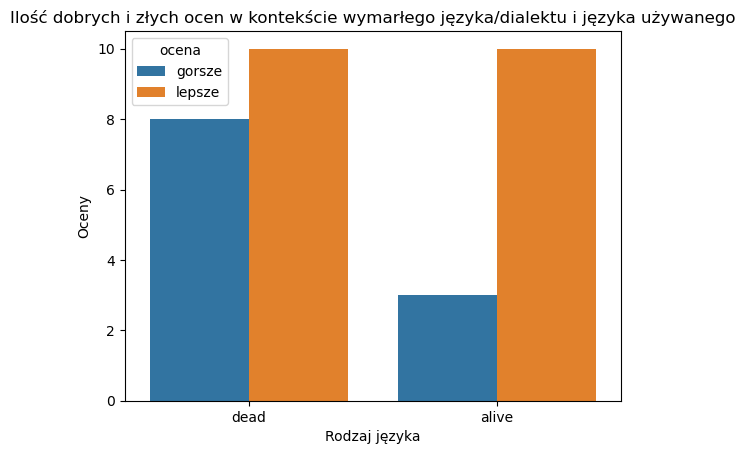

In [59]:
sns.countplot(data=df_5, x="language_category_3", hue="ocena")
plt.title("Ilość dobrych i złych ocen w kontekście wymarłego języka/dialektu i języka używanego")
plt.xlabel("Rodzaj języka")
plt.ylabel("Oceny")